In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import exp, abs, log
from scipy.special import gamma, factorial
import os
import scipy.stats as stats
import statsmodels.api as sm
from utils import *
import time
import datetime as dt
import universal as up
from universal import tools, algos
from universal.algos import *
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
def plot_confusion_matrix(cm,
                target_names,
                title='Confusion matrix',
                cmap=None,
                normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    plt.colorbar()

#     if target_names is not None:
#         tick_marks = np.arange(len(target_names))
#         plt.xticks(tick_marks, target_names, rotation=45)
#         plt.yticks(tick_marks, target_names, horizontalalignment="center")

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [7]:
def get_res(path, phase, maxiter, subn, lb):
    data_path1 = path%(phase, maxiter, subn, lb)
    print(data_path1)
    data1 = np.load(data_path1)
    return data1['predY0'], data1['std_varY0'], data1['val_predY0'], data1['val_std_varY0'], data1['sample_Y0']

In [104]:
def classify(phs):
    phs=phs
    print('Phase %d' % phs)
    data_path = './stock_data/stock_phase%02d_lb%d.npz' % (phs, lb)
    data = np.load(data_path)
    predY0, _, valY0, _, sample_Y0 = get_res(path, phs, maxiter, subn, lb)

    node_avg_rt = sample_Y0.reshape(-1) # nodes
    label_proportion = [1, 1, 1]

    th_tot = np.sum(label_proportion)
    tmp_rt = np.sort(node_avg_rt, axis=0)

    tmp_th = 0
    threshold = []
    for th in label_proportion:
        threshold.append(tmp_rt[int(len(node_avg_rt)*float(th+tmp_th)/th_tot-1)])
        tmp_th += th

    threshold

    bin_gt_neg = (sample_Y0 <= threshold[0])
    bin_gt_neu = np.logical_and(threshold[0] < sample_Y0, sample_Y0 <= threshold[1])
    bin_gt_pos = (threshold[1] < sample_Y0)

    print(np.sum(bin_gt_neg), np.sum(bin_gt_neu), np.sum(bin_gt_pos))
    print(np.sum(bin_gt_neg) + np.sum(bin_gt_neu) + np.sum(bin_gt_pos))



    node_avg_rt = valY0.reshape(-1) # nodes
#      node_avg_rt = sample_Y0.reshape(-1) # nodes
    label_proportion = [1, 1, 1]

    th_tot = np.sum(label_proportion)
    tmp_rt = np.sort(node_avg_rt, axis=0)

    tmp_th = 0
    pred_threshold = []
    for th in label_proportion:
        pred_threshold.append(tmp_rt[int(len(node_avg_rt)*float(th+tmp_th)/th_tot-1)])
        tmp_th += th

    pred_threshold

    bin_pred_neg = (predY0 <= pred_threshold[0])
    bin_pred_neu = np.logical_and(pred_threshold[0] < predY0, predY0 <= pred_threshold[1])
    bin_pred_pos = (pred_threshold[1] < predY0)

    print(np.sum(bin_pred_neg), np.sum(bin_pred_neu), np.sum(bin_pred_pos))
    print(np.sum(bin_pred_neg) + np.sum(bin_pred_neu) + np.sum(bin_pred_pos))



    y_true, y_pred = np.zeros(predY0.shape), np.zeros(predY0.shape)

    y_true[bin_gt_neg] = 0
    y_true[bin_gt_neu] = 1
    y_true[bin_gt_pos] = 2

    y_pred[bin_pred_neg] = 0
    y_pred[bin_pred_neu] = 1
    y_pred[bin_pred_pos] = 2

    cm = confusion_matrix(y_true.reshape(-1), y_pred.reshape(-1))

    plot_confusion_matrix(cm, ['pos', 'neu', 'neg'], normalize = False)


    print(classification_report(y_true.reshape(-1), y_pred.reshape(-1), digits=4, target_names=['pos', 'neu', 'neg']))
    return cm, y_true.reshape(-1), y_pred.reshape(-1)

In [105]:
lb = 5
maxiter = 8000
subn = 100
path='./tmp2/res_phase%02d_iter%d_subn%d_lb%d.npz'

Phase 4
./tmp2/res_phase04_iter8000_subn100_lb5.npz
3333 3333 3334
10000
3284 3459 3257
10000


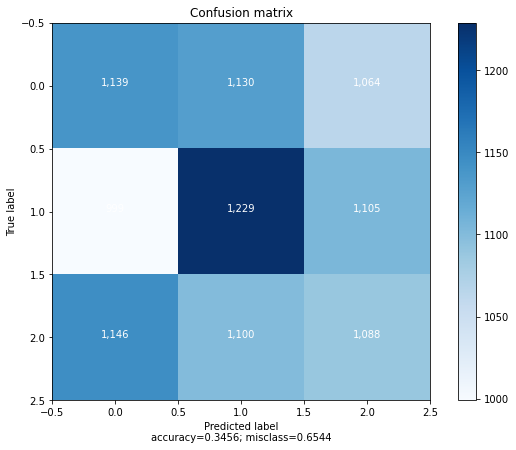

              precision    recall  f1-score   support

         pos     0.3468    0.3417    0.3443      3333
         neu     0.3553    0.3687    0.3619      3333
         neg     0.3340    0.3263    0.3301      3334

    accuracy                         0.3456     10000
   macro avg     0.3454    0.3456    0.3454     10000
weighted avg     0.3454    0.3456    0.3454     10000

Phase 5
./tmp2/res_phase05_iter8000_subn100_lb5.npz
3333 3333 3334
10000
3145 3280 3575
10000


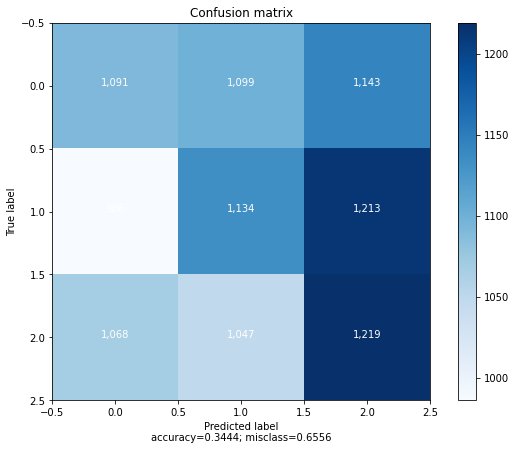

              precision    recall  f1-score   support

         pos     0.3469    0.3273    0.3368      3333
         neu     0.3457    0.3402    0.3430      3333
         neg     0.3410    0.3656    0.3529      3334

    accuracy                         0.3444     10000
   macro avg     0.3445    0.3444    0.3442     10000
weighted avg     0.3445    0.3444    0.3442     10000

Phase 6
./tmp2/res_phase06_iter8000_subn100_lb5.npz
3333 3333 3334
10000
3361 3590 3049
10000


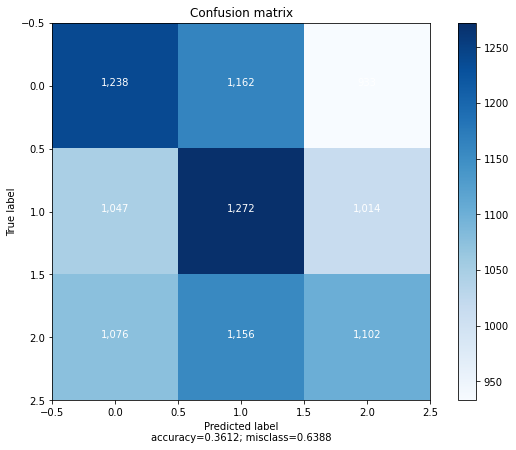

              precision    recall  f1-score   support

         pos     0.3683    0.3714    0.3699      3333
         neu     0.3543    0.3816    0.3675      3333
         neg     0.3614    0.3305    0.3453      3334

    accuracy                         0.3612     10000
   macro avg     0.3614    0.3612    0.3609     10000
weighted avg     0.3614    0.3612    0.3609     10000

Phase 7
./tmp2/res_phase07_iter8000_subn100_lb5.npz
3333 3333 3334
10000
3556 3283 3161
10000


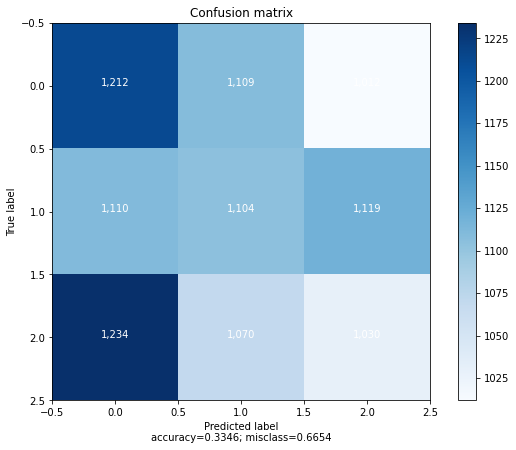

              precision    recall  f1-score   support

         pos     0.3408    0.3636    0.3519      3333
         neu     0.3363    0.3312    0.3337      3333
         neg     0.3258    0.3089    0.3172      3334

    accuracy                         0.3346     10000
   macro avg     0.3343    0.3346    0.3343     10000
weighted avg     0.3343    0.3346    0.3343     10000

Phase 8
./tmp2/res_phase08_iter8000_subn100_lb5.npz
3333 3333 3334
10000
3197 3175 3628
10000


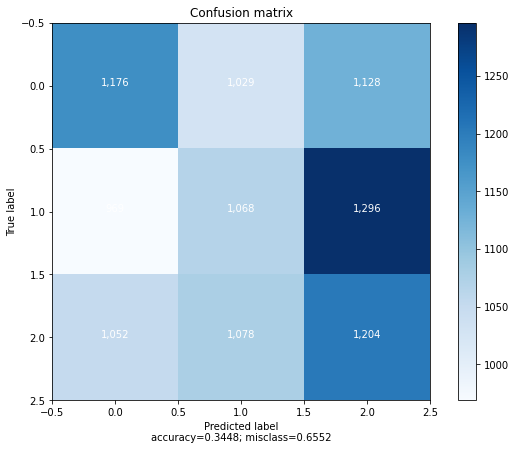

              precision    recall  f1-score   support

         pos     0.3678    0.3528    0.3602      3333
         neu     0.3364    0.3204    0.3282      3333
         neg     0.3319    0.3611    0.3459      3334

    accuracy                         0.3448     10000
   macro avg     0.3454    0.3448    0.3448     10000
weighted avg     0.3454    0.3448    0.3448     10000

Phase 9
./tmp2/res_phase09_iter8000_subn100_lb5.npz
3333 3333 3334
10000
3547 3467 2986
10000


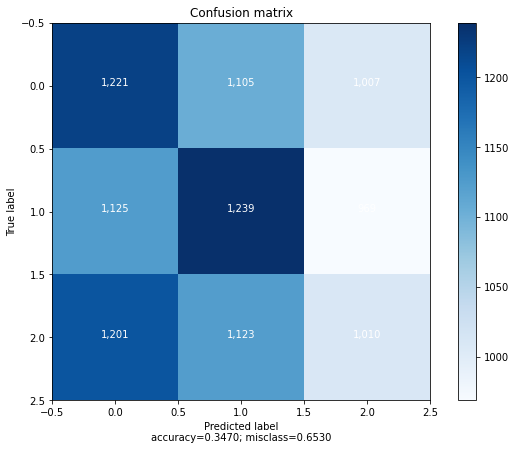

              precision    recall  f1-score   support

         pos     0.3442    0.3663    0.3549      3333
         neu     0.3574    0.3717    0.3644      3333
         neg     0.3382    0.3029    0.3196      3334

    accuracy                         0.3470     10000
   macro avg     0.3466    0.3470    0.3463     10000
weighted avg     0.3466    0.3470    0.3463     10000

Phase 10
./tmp2/res_phase10_iter8000_subn100_lb5.npz
3333 3333 3334
10000
3294 3053 3653
10000


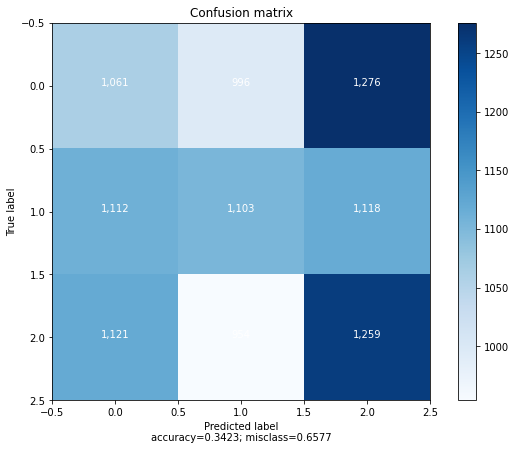

              precision    recall  f1-score   support

         pos     0.3221    0.3183    0.3202      3333
         neu     0.3613    0.3309    0.3454      3333
         neg     0.3446    0.3776    0.3604      3334

    accuracy                         0.3423     10000
   macro avg     0.3427    0.3423    0.3420     10000
weighted avg     0.3427    0.3423    0.3420     10000

Phase 11
./tmp2/res_phase11_iter8000_subn100_lb5.npz
3333 3333 3334
10000
3439 3490 3071
10000


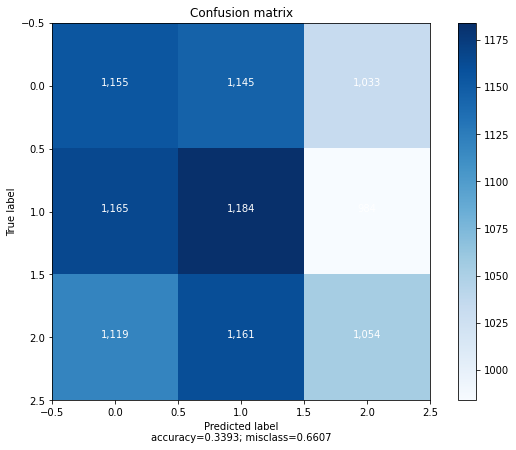

              precision    recall  f1-score   support

         pos     0.3359    0.3465    0.3411      3333
         neu     0.3393    0.3552    0.3471      3333
         neg     0.3432    0.3161    0.3291      3334

    accuracy                         0.3393     10000
   macro avg     0.3394    0.3393    0.3391     10000
weighted avg     0.3394    0.3393    0.3391     10000



In [106]:
cm_all=np.zeros((3,3))
all_y_true, all_y_pred = [], []

for phs in range(4, 12):
    cm, ytrue, ypred=classify(phs)
    all_y_true.append(ytrue)
    all_y_pred.append(ypred)
    cm_all += cm

In [107]:
cm_all

array([[9293., 8775., 8596.],
       [8513., 9333., 8818.],
       [9017., 8689., 8966.]])

In [108]:
all_y_true = np.concatenate(all_y_true)

In [109]:
all_y_pred = np.concatenate(all_y_pred)

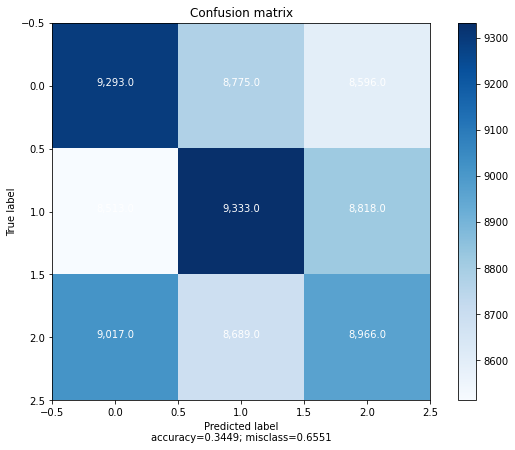

In [110]:
plot_confusion_matrix(cm_all, ['pos', 'neu', 'neg'], normalize = False)

In [111]:
print(classification_report(all_y_true.reshape(-1), all_y_pred.reshape(-1), digits=4, target_names=['pos', 'neu', 'neg'], labels=[0,1,2]))

              precision    recall  f1-score   support

         pos     0.3465    0.3485    0.3475     26664
         neu     0.3483    0.3500    0.3492     26664
         neg     0.3399    0.3362    0.3380     26672

    accuracy                         0.3449     80000
   macro avg     0.3449    0.3449    0.3449     80000
weighted avg     0.3449    0.3449    0.3449     80000



In [112]:
np.mean([0.3475, 0.3492, 0.3380])

0.3449

In [ ]:
2*0.3466*